In [1]:
import sympy as smp
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Ex - 1


In [2]:
Vp = smp.Symbol("V_p")
t = smp.Symbol("t")
T = smp.Symbol("T")

V_t = Vp * smp.sin(2 * smp.pi * 60 * t)
display(V_t)

V_p*sin(120*pi*t)

In [3]:
integral = smp.integrate(V_t**2, (t, 0, T))
display(integral)

V_p**2*(60*pi*T - sin(120*pi*T)*cos(120*pi*T)/2)/(120*pi)

In [4]:
rms = smp.sqrt(integral / T)
rms = rms.subs(T, 1 / 60)
display(rms.evalf())

0.707106781186548*(V_p**2)**0.5

Ex - 2


In [5]:
rms_311 = rms.subs(Vp, 311.2).evalf()
rms_155 = rms.subs(Vp, 155.5).evalf()

display(rms_311)
display(rms_155)

220.051630305254

109.955104474508

Ex - 3


In [6]:
x = smp.Symbol("x")
y = smp.Symbol("y")

G_x_y = x**2 + y**2 - 4 * x * y + 1
display(G_x_y)

x**2 - 4*x*y + y**2 + 1

In [7]:
G_x15_y = G_x_y.subs(x, 1.5).evalf()
G_x_y3 = G_x_y.subs(y, 3).evalf()
display(G_x_y3)
display(G_x15_y)

x**2 - 12.0*x + 10.0

y**2 - 6.0*y + 3.25

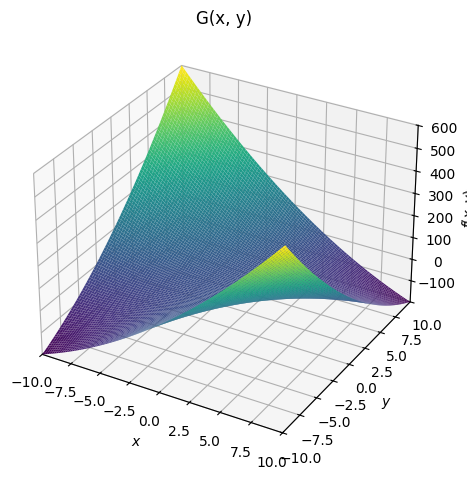

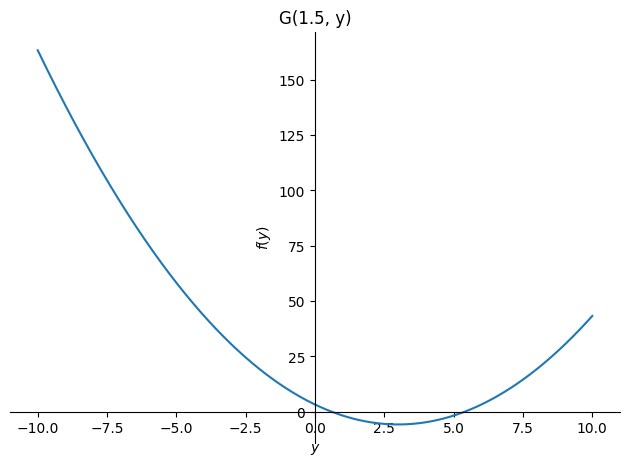

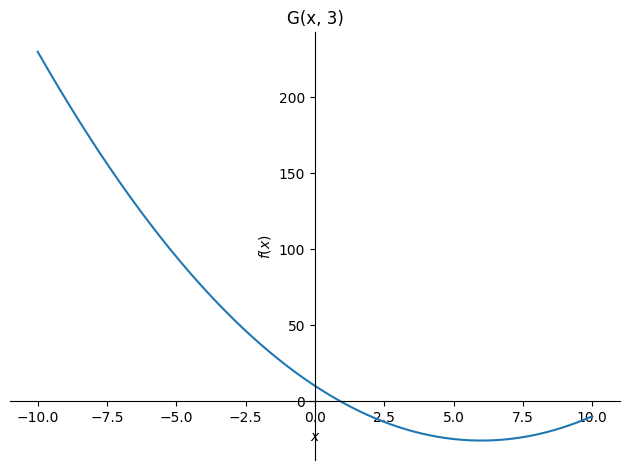

In [8]:
import sympy.plotting as syp

# Plot G_x_y using a 3D plot
plot1 = syp.plot3d(G_x_y, (x, -10, 10), (y, -10, 10), show=True, title="G(x, y)")

# Plot G_x15_y
plot2 = syp.plot(G_x15_y, (y, -10, 10), show=True, title="G(1.5, y)")

# Plot G_x_y3
plot3 = syp.plot(G_x_y3, (x, -10, 10), show=True, title="G(x, 3)")

Ex - 4

In [9]:
a = smp.Symbol("a")
b = smp.Symbol("b")
c = smp.Symbol("c")

f_x = a * x**2 + b * x + c

display(f_x)
f_x = f_x.subs({a: 1, b: 2, c: -3}).evalf()

display(f_x)

roots = smp.solve(f_x, x)
display(roots)

# Derivate f_x and find the critical points by setting the derivative to zero
derivative = smp.diff(f_x, x)
min = smp.solve(derivative, x, dict=False)
min_y = f_x.subs(x, min[0])
display(derivative)
display(min)
display(min_y)

a*x**2 + b*x + c

x**2 + 2.0*x - 3.0

[-3.00000000000000, 1.00000000000000]

2*x + 2.0

[-1.00000000000000]

-4.00000000000000

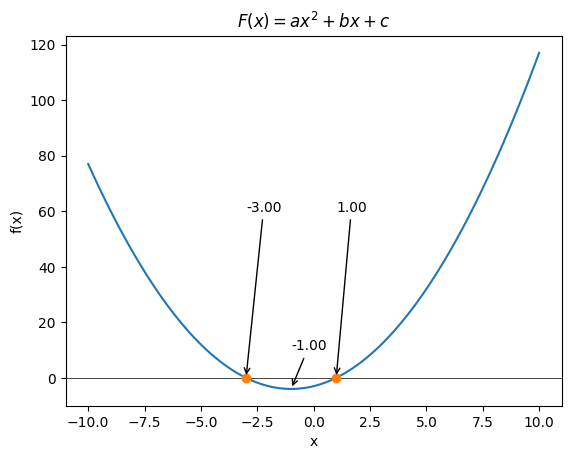

In [10]:
numpy_f_x = smp.lambdify(x, f_x, "numpy")
x_vals = np.linspace(-10, 10, 100)
y_vals = numpy_f_x(x_vals)

fig, ax = plt.subplots()
ax.plot(x_vals, y_vals)
ax.set_xlabel("x")
ax.set_ylabel("f(x)")
ax.set_title(f"$F({x}) = {a}x^2 + {b}x + {c}$")
ax.axhline(0, color="black", lw=0.5)
ax.plot(roots, [0, 0], "o")
ax.annotate(
    f"{roots[0]:.2f}",
    xy=(roots[0], 0),
    xytext=(roots[0], 60),
    arrowprops=dict(facecolor="red", arrowstyle="->"),
)
ax.annotate(
    f"{roots[1]:.2f}",
    xy=(roots[1], 0),
    xytext=(roots[1], 60),
    arrowprops=dict(facecolor="red", arrowstyle="->"),
)
ax.annotate(
    f"{min[0]:.2f}",
    xy=(min[0], min_y),
    xytext=(min[0], 10),
    arrowprops=dict(facecolor="red", arrowstyle="->"),
)

plt.show()

Ex - 5

In [11]:
f = a * x**2 + b * x + c
f = f.subs({a: 1, b: -2, c: 1}).evalf()
display(f)

g = 2 * x + 1
display(g)

f_numpy = smp.lambdify(x, f)
g_numpy = smp.lambdify(x, g)

intersection = smp.solve(f - g, x)
display(intersection)

x**2 - 2.0*x + 1.0

2*x + 1

[0.0, 4.00000000000000]

Text(0, 20, 'Intersections')

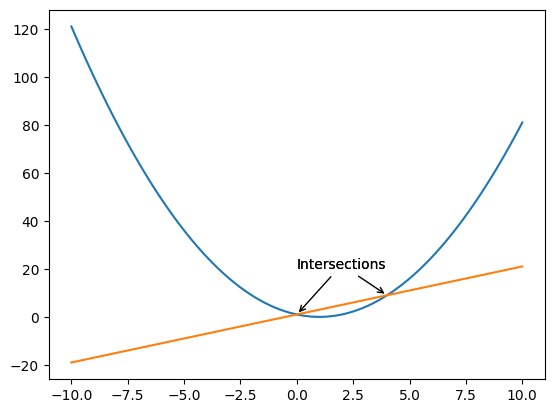

In [12]:
x_vals = np.linspace(-10, 10, 100)

fig, ax = plt.subplots()
ax.plot(x_vals, f_numpy(x_vals), label="f(x)")
ax.plot(x_vals, g_numpy(x_vals), label="g(x)")
ax.annotate(
    "Intersections",
    xy=(intersection[0], f_numpy(intersection[0])),
    xytext=(0, 20),
    arrowprops=dict(facecolor="red", arrowstyle="->"),
)
ax.annotate(
    "Intersections",
    xy=(intersection[1], f_numpy(intersection[1])),
    xytext=(0, 20),
    arrowprops=dict(facecolor="red", arrowstyle="->"),
)

Ex - 6 

In [17]:
df = pd.read_csv("data/NotasEEL5105.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Turma    167 non-null    object 
 1   N        167 non-null    int64  
 2   Prova 1  167 non-null    float64
 3   Prova 2  167 non-null    float64
 4   Média    167 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 6.7+ KB


In [64]:
df_por_turma = df.groupby("Turma")[["Prova 1", "Prova 2", "Média"]].mean()
turmas = df["Turma"].unique()
display(turmas)

array(['1208A', '3202A', '3235', '2220A', '2220B', '8213A'], dtype=object)

In [48]:
from pprint import pprint

media_P1 = df["Prova 1"].mean()
media_P2 = df["Prova 2"].mean()
media_Final = df["Média"].mean()

pprint((media_P1, media_P2, media_Final))

(np.float64(5.7604790419161676),
 np.float64(5.514970059880239),
 np.float64(5.637724550898204))


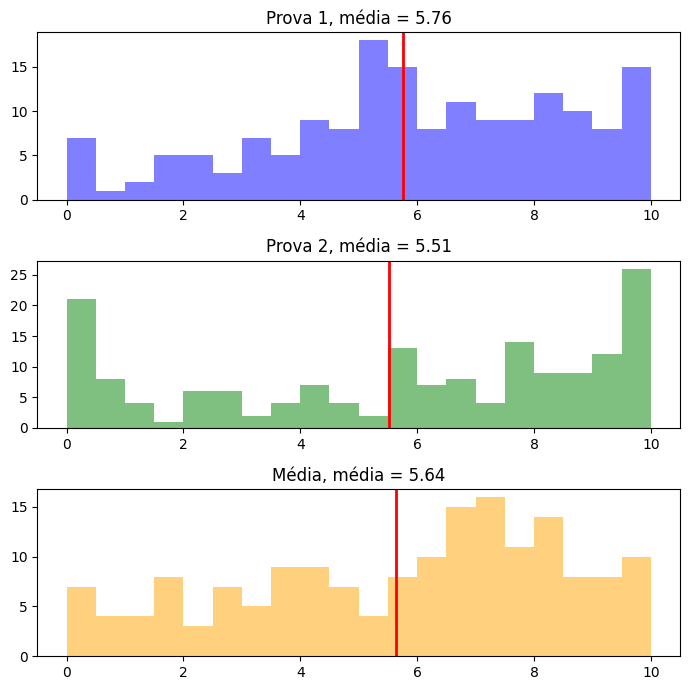

In [39]:
fig, ax = plt.subplots(3, figsize=(7, 7))

ax[0].hist(df["Prova 1"], bins=20, color="blue", alpha=0.5)
ax[0].axvline(media_P1, color="red", lw=2)
ax[0].set_title("Prova 1, média = {:.2f}".format(media_P1))

ax[1].hist(df["Prova 2"], bins=20, color="green", alpha=0.5)
ax[1].axvline(media_P2, color="red", lw=2)
ax[1].set_title("Prova 2, média = {:.2f}".format(media_P2))

ax[2].hist(df["Média"], bins=20, color="orange", alpha=0.5)
ax[2].axvline(media_Final, color="red", lw=2)
ax[2].set_title("Média, média = {:.2f}".format(media_Final))


fig.tight_layout()
plt.show()

In [71]:
acima_p1 = df[df["Prova 1"] > 6]
print(f"Alunos com nota acima da média na Prova 1: {acima_p1.shape[0]}")

acima_p2 = df[df["Prova 2"] > 6]
print(f"Alunos com nota acima da média na Prova 2: {acima_p2.shape[0]}")

acima_final = df[df["Média"] > 6]
print(f"Alunos com nota acima da média na média final: {acima_final.shape[0]}")

Alunos com nota acima da média na Prova 1: 74
Alunos com nota acima da média na Prova 2: 82
Alunos com nota acima da média na média final: 89


In [72]:
acima_final["Média"].mean()

np.float64(7.797752808988764)

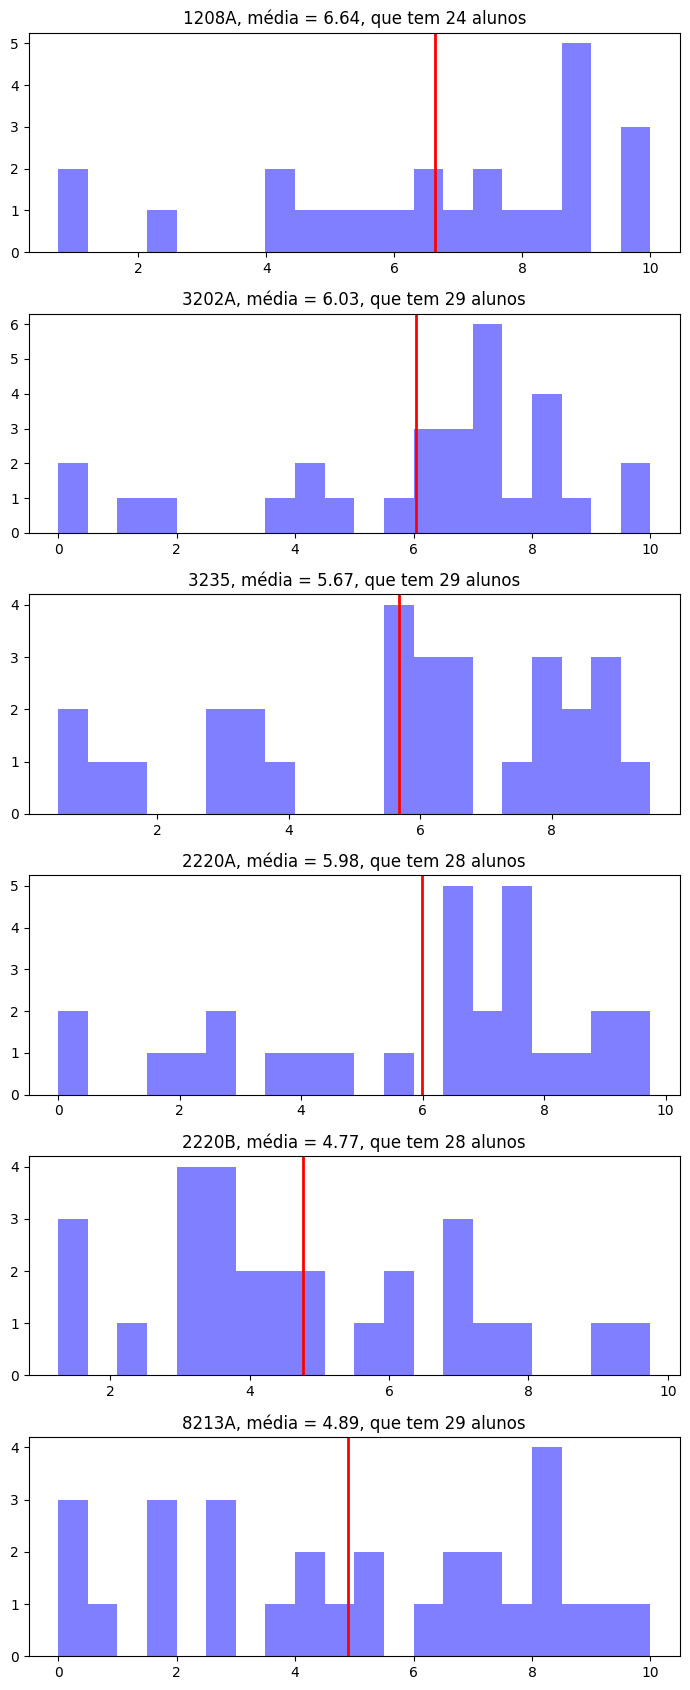

In [73]:
fig, ax = plt.subplots(int(turmas.shape[0]), figsize=(7, 17))

for i, turma in enumerate(turmas):
    ax[i].hist(df[df["Turma"] == turma]["Média"], bins=20, color="blue", alpha=0.5)
    ax[i].axvline(df_por_turma.loc[turma, "Média"], color="red", lw=2)
    ax[i].set_title(
        f"{turma}, média = {df_por_turma.loc[turma, 'Média']:.2f}, que tem {df[df['Turma'] == turma].shape[0]} alunos"
    )

fig.tight_layout()
plt.show()